In [2]:
# Import data
dataset = read.csv('Position_Salaries.csv')
dataset = dataset[2:3]

In [3]:
head(dataset)

Level,Salary
1,45000
2,50000
3,60000
4,80000
5,110000
6,150000


In [4]:
# Fitting Linear Regression
lin_reg = lm(formula = Salary ~ .,
             data = dataset)

In [5]:
lin_reg


Call:
lm(formula = Salary ~ ., data = dataset)

Coefficients:
(Intercept)        Level  
    -195333        80879  


In [6]:
# Fitting Polynomial Regression (by creating polynomial terms to independent vriable "Level")
dataset$Level2 = dataset$Level^2
dataset$Level3 = dataset$Level^3
dataset$Level4 = dataset$Level^4
poly_reg = lm(formula = Salary ~ .,
              data = dataset)

In [7]:
head(dataset)

Level,Salary,Level2,Level3,Level4
1,45000,1,1,1
2,50000,4,8,16
3,60000,9,27,81
4,80000,16,64,256
5,110000,25,125,625
6,150000,36,216,1296


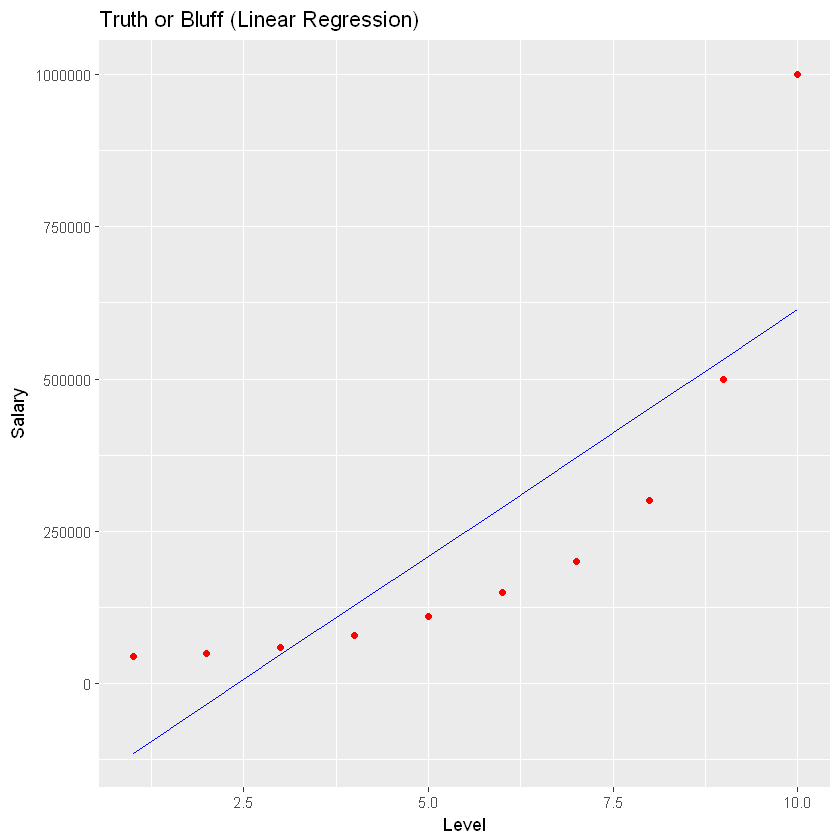

In [9]:
# Visualising Linear Regression
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(lin_reg, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Linear Regression)') +
  xlab('Level') +
  ylab('Salary')

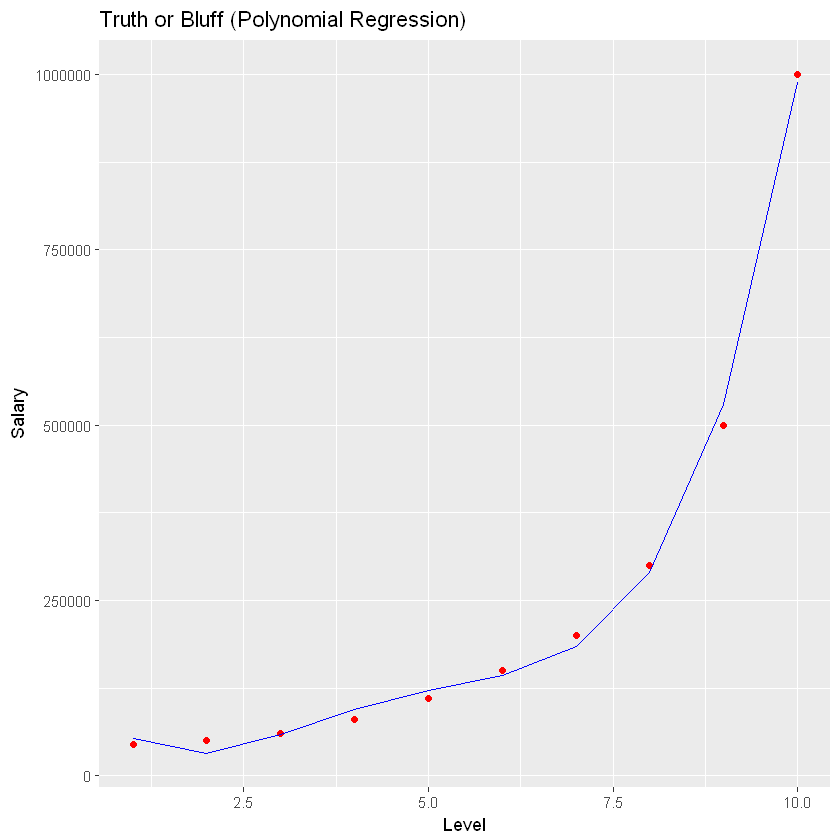

In [10]:
# Visualising the Polynomial Regression results
library(ggplot2)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = dataset$Level, y = predict(poly_reg, newdata = dataset)),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Polynomial Regression)') +
  xlab('Level') +
  ylab('Salary')

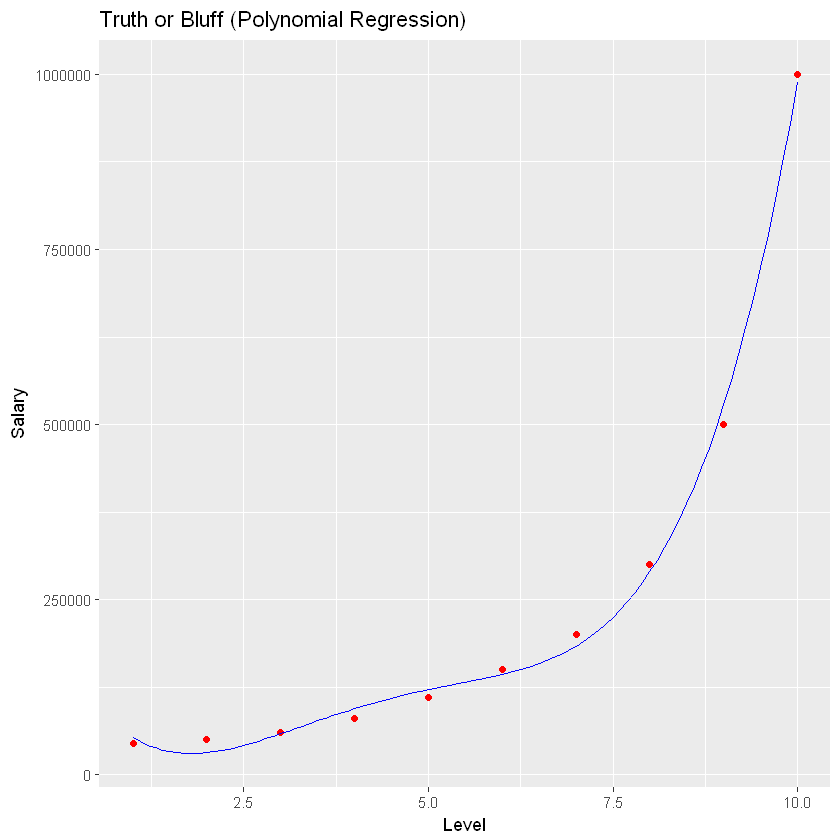

In [11]:
# Visualising the Regression Model results (for higher resolution and smoother curve)
library(ggplot2)
x_grid = seq(min(dataset$Level), max(dataset$Level), 0.1)
ggplot() +
  geom_point(aes(x = dataset$Level, y = dataset$Salary),
             colour = 'red') +
  geom_line(aes(x = x_grid, y = predict(poly_reg,
                                        newdata = data.frame(Level = x_grid,
                                                             Level2 = x_grid^2,
                                                             Level3 = x_grid^3,
                                                             Level4 = x_grid^4))),
            colour = 'blue') +
  ggtitle('Truth or Bluff (Polynomial Regression)') +
  xlab('Level') +
  ylab('Salary')

In [12]:
# Predicting a new result with Linear Regression
predict(lin_reg, data.frame(Level = 6.5))

1 
330378.8

In [13]:
# Predicting a new result with Polynomial Regression
predict(poly_reg, data.frame(Level = 6.5,
                             Level2 = 6.5^2,
                             Level3 = 6.5^3,
                             Level4 = 6.5^4))

1 
158862.5